# Breast cancer Classification With Neural Network
# Importing Dependencies

In [1]:
import pandas as pd 
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Processing

In [2]:
#loadind data from sklearn
disease_dataset = sklearn.datasets.load_breast_cancer()
print(disease_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
#loading data to a dataframe
data_frame = pd.DataFrame(disease_dataset.data, columns = disease_dataset.feature_names)
data_frame.head() #for 1st 5 row of dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#adding target column to a datafrane
data_frame['diagnosis'] = disease_dataset.target
data_frame.tail()  #for last 5 row of the dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [5]:
#basic analysis of above data
data_frame.shape   #for no of rows and columns in dataset
data_frame.info    #info of dataset

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [6]:
#checking missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [7]:
#statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
#distribution of diagnosis variable
data_frame['diagnosis'].value_counts()
#1 represents - Benign
#0 represents - malignant

1    357
0    212
Name: diagnosis, dtype: int64

In [9]:
data_frame.groupby('diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Separating The Features and Target 

In [10]:
x = data_frame.drop('diagnosis', axis = 1)
y = data_frame['diagnosis']
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [11]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int32


# Splitting The Data Into Training Data and Testing Data

In [12]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size = 0.2 , random_state = 2)

In [13]:
#checking data point in test and training data
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


# Standardizing the Data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)
print(x_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


# Building a Neural Network

In [16]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [17]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [18]:
#compiling the neural network
model.compile(optimizer ='adam',
             loss='sparse_categorical_crossentropy',
             metrics =['accuracy'])

In [19]:
#training the neural network
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10)


Epoch 1/10
13/13 [==============================] - 6s 83ms/step - loss: 205.8716 - accuracy: 0.3692 - val_loss: 187.5631 - val_accuracy: 0.3478
Epoch 2/10
13/13 [==============================] - 0s 13ms/step - loss: 161.2482 - accuracy: 0.3692 - val_loss: 144.2929 - val_accuracy: 0.3478
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: 121.7264 - accuracy: 0.3692 - val_loss: 104.4620 - val_accuracy: 0.3478
Epoch 4/10
13/13 [==============================] - 0s 13ms/step - loss: 85.6496 - accuracy: 0.3692 - val_loss: 69.0286 - val_accuracy: 0.3478
Epoch 5/10
13/13 [==============================] - 0s 14ms/step - loss: 50.7757 - accuracy: 0.3692 - val_loss: 32.7282 - val_accuracy: 0.3478
Epoch 6/10
13/13 [==============================] - 0s 14ms/step - loss: 15.1654 - accuracy: 0.4303 - val_loss: 3.2038 - val_accuracy: 0.6522
Epoch 7/10
13/13 [==============================] - 0s 12ms/step - loss: 4.2811 - accuracy: 0.6601 - val_loss: 1.8265 - val_accuracy: 0.5

# Visualizing Accuracy and Loss

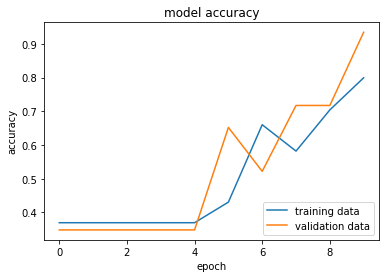

In [20]:
#Accuracy value
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

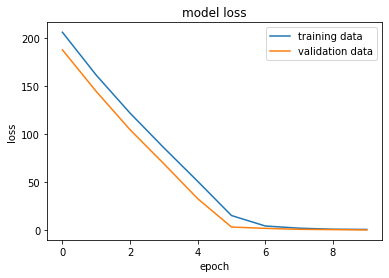

In [21]:
#Loss Value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

# Accuracy of the model on test data

In [22]:
loss, accuracy = model.evaluate(x_test_std, y_test)

4/4 [==============================] - 0s 13ms/step - loss: 1.1925 - accuracy: 0.2105


In [23]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [24]:
y_pred = model.predict(x_test_std)

In [25]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.47677118 0.31112415]


In [26]:
print(x_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [27]:
print(y_pred)

[[0.47677118 0.31112415]
 [0.46912003 0.548224  ]
 [0.63671166 0.44907162]
 [0.10746536 0.4748685 ]
 [0.4271845  0.404386  ]
 [0.26360735 0.49429837]
 [0.44112396 0.5537374 ]
 [0.64518887 0.20315275]
 [0.60346365 0.473036  ]
 [0.625317   0.24634403]
 [0.528419   0.46477357]
 [0.4405617  0.4740452 ]
 [0.4353856  0.43757248]
 [0.45430222 0.5655053 ]
 [0.6712979  0.58298373]
 [0.34598827 0.46887782]
 [0.6019769  0.3796763 ]
 [0.46875706 0.4102915 ]
 [0.668056   0.43393183]
 [0.22541368 0.5827341 ]
 [0.15801477 0.17813799]
 [0.47539935 0.17766768]
 [0.55922604 0.5276127 ]
 [0.612027   0.1349845 ]
 [0.43014422 0.2731578 ]
 [0.38774568 0.49850482]
 [0.448216   0.27689034]
 [0.4161731  0.17856875]
 [0.54285693 0.5109297 ]
 [0.46014917 0.5328415 ]
 [0.57439476 0.1569531 ]
 [0.56365836 0.5881223 ]
 [0.50501823 0.18039104]
 [0.1881277  0.5900048 ]
 [0.29513207 0.5803027 ]
 [0.4425885  0.41533104]
 [0.6507273  0.4073486 ]
 [0.54945326 0.50937283]
 [0.39082348 0.24803811]
 [0.46372762 0.53192997]


# model.predict()gives the prediction probability of each class for the data point

In [28]:
#converting the prediction probability to class labels
y_pred_labels =[np.argmax(i)for i in y_pred]  #argmax finds the index of highest value
print(y_pred_labels)

[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]


# Building  Predictive System

In [30]:
#changing input_data to a numpy array 
input_data = (14.97,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.178,0.0565,0.2713,1.217,1.893,24.28,0.00508,0.0137,0.007276,0.009073,0.0135,0.001706,16.11,23,104.6,793.7,0.1216,0.1637,0.06648,0.08485,0.2404,0.06428)
input_data_as_numpy = np.asarray(input_data)

#reshaping numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy.reshape(1,-1)

#standardizing the input_data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==[0]):
    print("The Tumor Is Malignant")
else:
    print("The Tumor Is Benign")

[[0.57534826 0.37897122]]
[0]
The Tumor Is Malignant


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
